In [45]:
import time


def blink(stones, iters):
    new_stones = []
    start_time = time.time()
    for stone in stones:
        if stone == 0:
            new_stones.append(1)
        elif len(str(stone)) % 2 == 0:
            substone1 = int(str(stone)[:len(str(stone))//2])
            substone2 = int(str(stone)[len(str(stone))//2:])
            new_stones.append(substone1)
            new_stones.append(substone2)
        else:
            new_stones.append(stone * 2024)
    end_time = time.time()
    print(f"Iteration {iters} took {end_time - start_time:.4f} seconds")
    return blink(new_stones, iters-1) if iters > 1 else new_stones

with open('input11.txt') as f:
    stones = [int(x) for x in f.read().split()]

n_blinks = 75
stones = blink(stones, n_blinks)
print(len(stones))

Iteration 75 took 0.0000 seconds
Iteration 74 took 0.0000 seconds
Iteration 73 took 0.0000 seconds
Iteration 72 took 0.0000 seconds
Iteration 71 took 0.0000 seconds
Iteration 70 took 0.0000 seconds
Iteration 69 took 0.0001 seconds
Iteration 68 took 0.0001 seconds
Iteration 67 took 0.0001 seconds
Iteration 66 took 0.0001 seconds
Iteration 65 took 0.0002 seconds
Iteration 64 took 0.0003 seconds
Iteration 63 took 0.0004 seconds
Iteration 62 took 0.0008 seconds
Iteration 61 took 0.0010 seconds
Iteration 60 took 0.0015 seconds
Iteration 59 took 0.0024 seconds
Iteration 58 took 0.0032 seconds
Iteration 57 took 0.0047 seconds
Iteration 56 took 0.0061 seconds
Iteration 55 took 0.0088 seconds
Iteration 54 took 0.0140 seconds
Iteration 53 took 0.0177 seconds
Iteration 52 took 0.0258 seconds
Iteration 51 took 0.0414 seconds
Iteration 50 took 0.0613 seconds
Iteration 49 took 0.0911 seconds
Iteration 48 took 0.1404 seconds
Iteration 47 took 0.2350 seconds
Iteration 46 took 0.3200 seconds
Iteration 

KeyboardInterrupt: 

In [28]:
%%time
import functools
with open('input11.txt') as f:
    stones = [int(x) for x in f.read().split()]

@functools.cache
def calc_stones_at_n(stone, iters):
    if iters == 0:
        return 1
    
    n = len(str(stone))
    if stone == 0:
        return calc_stones_at_n(1, iters-1)

    elif n % 2 == 0:
        substone1 = int(str(stone)[:n//2])
        substone2 = int(str(stone)[n//2:])
        return (calc_stones_at_n(substone1, iters-1) + calc_stones_at_n(substone2, iters-1))
    else:
        return calc_stones_at_n(stone * 2024, iters-1)

ans = sum([calc_stones_at_n(x, 75) for x in stones])
print(ans)

232454623677743
CPU times: user 73.3 ms, sys: 4.12 ms, total: 77.5 ms
Wall time: 83.2 ms


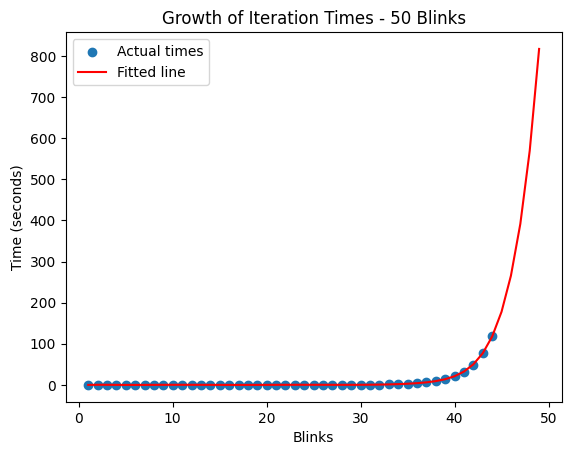

In [25]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

# Function to break the y-axis
# Fit a line to the growth
coefficients = np.polyfit(deltas['x'], deltas['y'], 9)
polynomial = np.poly1d(coefficients)
x_fit = np.arange(1, 76)
y_fit = polynomial(x_fit)

# Plot the fitted line
ax.plot(x_fit, y_fit, label='Fitted line', color='red')

# Break the y-axis
ax, ax2 = break_y_axis(ax, 240)

# Plot the predicted times up to x=75
ax.set_xlabel('Iteration')
ax.set_ylabel('Time (seconds)')
ax.set_title('Growth of Iteration Times')
ax.legend()
plt.show()


times = """Iteration 75 took 0.0000 seconds
Iteration 74 took 0.0000 seconds
Iteration 73 took 0.0000 seconds
Iteration 72 took 0.0000 seconds
Iteration 71 took 0.0000 seconds
Iteration 70 took 0.0000 seconds
Iteration 69 took 0.0001 seconds
Iteration 68 took 0.0001 seconds
Iteration 67 took 0.0001 seconds
Iteration 66 took 0.0001 seconds
Iteration 65 took 0.0002 seconds
Iteration 64 took 0.0003 seconds
Iteration 63 took 0.0004 seconds
Iteration 62 took 0.0008 seconds
Iteration 61 took 0.0010 seconds
Iteration 60 took 0.0015 seconds
Iteration 59 took 0.0024 seconds
Iteration 58 took 0.0032 seconds
Iteration 57 took 0.0047 seconds
Iteration 56 took 0.0061 seconds
Iteration 55 took 0.0088 seconds
Iteration 54 took 0.0140 seconds
Iteration 53 took 0.0177 seconds
Iteration 52 took 0.0258 seconds
Iteration 51 took 0.0414 seconds
Iteration 50 took 0.0613 seconds
Iteration 49 took 0.0911 seconds
Iteration 48 took 0.1404 seconds
Iteration 47 took 0.2350 seconds
Iteration 46 took 0.3200 seconds
Iteration 45 took 0.4792 seconds
Iteration 44 took 0.7389 seconds
Iteration 43 took 1.1049 seconds
Iteration 42 took 1.7077 seconds
Iteration 41 took 2.5381 seconds
Iteration 40 took 3.8861 seconds
Iteration 39 took 5.8408 seconds
Iteration 38 took 8.8655 seconds
Iteration 37 took 13.9920 seconds
Iteration 36 took 21.8194 seconds
Iteration 35 took 32.4811 seconds
Iteration 34 took 49.3628 seconds
Iteration 33 took 76.6150 seconds
Iteration 32 took 117.7637 seconds
"""
deltas = {'x': [], 'y': []}
it = 1
for time in times.split('\n'):
    if time.strip():  # Skip empty lines
        #it = int(time.split()[1])
        t = float(time.split()[3])
        deltas['x'].append(it)
        deltas['y'].append(t)
        it += 1

import matplotlib.pyplot as plt

# Plot the growth of deltas
plt.scatter(deltas['x'], deltas['y'], label='Actual times')

# Fit a line to the growth
coefficients = np.polyfit(deltas['x'], deltas['y'], 9)
polynomial = np.poly1d(coefficients)
x_fit = np.arange(1, 50)
y_fit = polynomial(x_fit)

# Plot the fitted line
plt.plot(x_fit, y_fit, label='Fitted line', color='red')

# Plot the predicted times up to x=75
plt.xlabel('Blinks')
plt.ylabel('Time (seconds)')
plt.title('Growth of Iteration Times - 50 Blinks')
plt.legend()
plt.show()


In [17]:
x_fit = np.arange(1, 75)
y_fit = polynomial(x_fit)
y_fit[-1]

373473.8857587678

In [18]:
iteration_75_time = polynomial(75)
print(f"The 75th iteration would take approximately {iteration_75_time:.4f} seconds.")

The 75th iteration would take approximately 444210.8763 seconds.


In [26]:
print(sum([polynomial(x) for x in range(1, 76)]))

2545974.006993941


In [27]:
2545974.006993941 / 60 / 60

707.2150019427613

In [30]:
import json 
scores = json.loads("""{
  "members": {
    "619076": {
      "name": "kaltepeter",
      "local_score": 233,
      "id": 619076,
      "stars": 11,
      "last_star_ts": 1733814595,
      "global_score": 0,
      "completion_day_level": {
        "1": {
          "2": {
            "star_index": 107038,
            "get_star_ts": 1733065974
          },
          "1": {
            "get_star_ts": 1733064778,
            "star_index": 103641
          }
        },
        "6": {
          "1": {
            "get_star_ts": 1733814595,
            "star_index": 1981497
          }
        },
        "3": {
          "2": {
            "get_star_ts": 1733206729,
            "star_index": 555667
          },
          "1": {
            "get_star_ts": 1733204601,
            "star_index": 544848
          }
        },
        "5": {
          "2": {
            "star_index": 1877560,
            "get_star_ts": 1733756989
          },
          "1": {
            "star_index": 1872345,
            "get_star_ts": 1733754586
          }
        },
        "2": {
          "2": {
            "get_star_ts": 1733152301,
            "star_index": 377470
          },
          "1": {
            "star_index": 247352,
            "get_star_ts": 1733120356
          }
        },
        "4": {
          "1": {
            "get_star_ts": 1733440469,
            "star_index": 1246016
          },
          "2": {
            "star_index": 1400490,
            "get_star_ts": 1733510519
          }
        }
      }
    },
    "4221367": {
      "completion_day_level": {
        "1": {
          "1": {
            "get_star_ts": 1733704011,
            "star_index": 1783409
          },
          "2": {
            "star_index": 1784118,
            "get_star_ts": 1733704838
          }
        }
      },
      "stars": 2,
      "last_star_ts": 1733704838,
      "global_score": 0,
      "name": "Ariel Arevalo",
      "local_score": 13,
      "id": 4221367
    },
    "622321": {
      "local_score": 355,
      "name": "wcchristian",
      "id": 622321,
      "completion_day_level": {
        "4": {
          "2": {
            "star_index": 1217315,
            "get_star_ts": 1733429071
          },
          "1": {
            "get_star_ts": 1733428132,
            "star_index": 1214702
          }
        },
        "2": {
          "1": {
            "get_star_ts": 1733118176,
            "star_index": 237502
          },
          "2": {
            "get_star_ts": 1733119814,
            "star_index": 245193
          }
        },
        "5": {
          "1": {
            "star_index": 1224291,
            "get_star_ts": 1733431526
          },
          "2": {
            "get_star_ts": 1733434777,
            "star_index": 1233261
          }
        },
        "3": {
          "1": {
            "star_index": 679650,
            "get_star_ts": 1733237406
          },
          "2": {
            "get_star_ts": 1733238807,
            "star_index": 684946
          }
        },
        "8": {
          "1": {
            "star_index": 1770024,
            "get_star_ts": 1733694519
          },
          "2": {
            "get_star_ts": 1733696461,
            "star_index": 1773551
          }
        },
        "7": {
          "1": {
            "get_star_ts": 1733691583,
            "star_index": 1763828
          },
          "2": {
            "get_star_ts": 1733691716,
            "star_index": 1764144
          }
        },
        "1": {
          "1": {
            "star_index": 10163,
            "get_star_ts": 1733030611
          },
          "2": {
            "get_star_ts": 1733031076,
            "star_index": 12142
          }
        },
        "6": {
          "1": {
            "star_index": 1622067,
            "get_star_ts": 1733625375
          },
          "2": {
            "star_index": 1757041,
            "get_star_ts": 1733688513
          }
        }
      },
      "last_star_ts": 1733696461,
      "stars": 16,
      "global_score": 0
    },
    "2870217": {
      "id": 2870217,
      "local_score": 499,
      "name": "Evan Easton",
      "completion_day_level": {
        "9": {
          "1": {
            "get_star_ts": 1733729887,
            "star_index": 1821016
          },
          "2": {
            "star_index": 1923140,
            "get_star_ts": 1733778448
          }
        },
        "8": {
          "2": {
            "star_index": 1657357,
            "get_star_ts": 1733644651
          },
          "1": {
            "get_star_ts": 1733643840,
            "star_index": 1655863
          }
        },
        "7": {
          "1": {
            "star_index": 1494189,
            "get_star_ts": 1733561782
          },
          "2": {
            "star_index": 1495329,
            "get_star_ts": 1733562306
          }
        },
        "10": {
          "2": {
            "get_star_ts": 1733812662,
            "star_index": 1977318
          },
          "1": {
            "star_index": 1976632,
            "get_star_ts": 1733812352
          }
        },
        "3": {
          "2": {
            "get_star_ts": 1733206668,
            "star_index": 555392
          },
          "1": {
            "star_index": 552600,
            "get_star_ts": 1733206068
          }
        },
        "5": {
          "2": {
            "get_star_ts": 1733412392,
            "star_index": 1173246
          },
          "1": {
            "get_star_ts": 1733407858,
            "star_index": 1160602
          }
        },
        "1": {
          "1": {
            "star_index": 132309,
            "get_star_ts": 1733074539
          },
          "2": {
            "get_star_ts": 1733074885,
            "star_index": 133331
          }
        },
        "6": {
          "1": {
            "star_index": 1285310,
            "get_star_ts": 1733465034
          },
          "2": {
            "get_star_ts": 1733472406,
            "star_index": 1305001
          }
        },
        "4": {
          "1": {
            "star_index": 847746,
            "get_star_ts": 1733296233
          },
          "2": {
            "get_star_ts": 1733305595,
            "star_index": 880841
          }
        },
        "2": {
          "1": {
            "star_index": 370306,
            "get_star_ts": 1733150567
          },
          "2": {
            "star_index": 374559,
            "get_star_ts": 1733151576
          }
        }
      },
      "last_star_ts": 1733812662,
      "stars": 20,
      "global_score": 0
    },
    "4761046": {
      "name": "Adam Iverson",
      "local_score": 4,
      "id": 4761046,
      "last_star_ts": 1733866515,
      "stars": 1,
      "global_score": 0,
      "completion_day_level": {
        "1": {
          "1": {
            "get_star_ts": 1733866515,
            "star_index": 2082360
          }
        }
      }
    },
    "4483476": {
      "local_score": 506,
      "name": "Thamin",
      "id": 4483476,
      "completion_day_level": {
        "6": {
          "1": {
            "get_star_ts": 1733469499,
            "star_index": 1297473
          },
          "2": {
            "get_star_ts": 1733472323,
            "star_index": 1304782
          }
        },
        "1": {
          "2": {
            "star_index": 348868,
            "get_star_ts": 1733145191
          },
          "1": {
            "star_index": 321285,
            "get_star_ts": 1733137774
          }
        },
        "8": {
          "2": {
            "get_star_ts": 1733640096,
            "star_index": 1648860
          },
          "1": {
            "get_star_ts": 1733638797,
            "star_index": 1646022
          }
        },
        "9": {
          "1": {
            "star_index": 1826332,
            "get_star_ts": 1733732488
          },
          "2": {
            "get_star_ts": 1733738541,
            "star_index": 1839523
          }
        },
        "7": {
          "1": {
            "star_index": 1481343,
            "get_star_ts": 1733555822
          },
          "2": {
            "star_index": 1482239,
            "get_star_ts": 1733556276
          }
        },
        "5": {
          "2": {
            "get_star_ts": 1733381970,
            "star_index": 1085628
          },
          "1": {
            "get_star_ts": 1733380896,
            "star_index": 1082263
          }
        },
        "10": {
          "2": {
            "star_index": 1974933,
            "get_star_ts": 1733811603
          },
          "1": {
            "star_index": 1974709,
            "get_star_ts": 1733811503
          }
        },
        "3": {
          "1": {
            "get_star_ts": 1733210234,
            "star_index": 570837
          },
          "2": {
            "get_star_ts": 1733215169,
            "star_index": 594044
          }
        },
        "4": {
          "1": {
            "star_index": 854474,
            "get_star_ts": 1733298219
          },
          "2": {
            "star_index": 857561,
            "get_star_ts": 1733299096
          }
        },
        "2": {
          "2": {
            "star_index": 388968,
            "get_star_ts": 1733155030
          },
          "1": {
            "star_index": 357407,
            "get_star_ts": 1733147392
          }
        }
      },
      "global_score": 0,
      "last_star_ts": 1733811603,
      "stars": 20
    },
    "1634041": {
      "id": 1634041,
      "local_score": 622,
      "name": "Whelch",
      "stars": 22,
      "last_star_ts": 1733894905,
      "global_score": 0,
      "completion_day_level": {
        "2": {
          "1": {
            "get_star_ts": 1733116109,
            "star_index": 220117
          },
          "2": {
            "get_star_ts": 1733117254,
            "star_index": 231677
          }
        },
        "4": {
          "2": {
            "star_index": 818745,
            "get_star_ts": 1733289742
          },
          "1": {
            "get_star_ts": 1733288880,
            "star_index": 812650
          }
        },
        "11": {
          "1": {
            "star_index": 2110440,
            "get_star_ts": 1733893703
          },
          "2": {
            "star_index": 2118367,
            "get_star_ts": 1733894905
          }
        },
        "1": {
          "2": {
            "get_star_ts": 1733029766,
            "star_index": 3835
          },
          "1": {
            "get_star_ts": 1733029502,
            "star_index": 0
          }
        },
        "6": {
          "2": {
            "star_index": 1298665,
            "get_star_ts": 1733469980
          },
          "1": {
            "star_index": 1274359,
            "get_star_ts": 1733462565
          }
        },
        "5": {
          "1": {
            "get_star_ts": 1733376016,
            "star_index": 1059386
          },
          "2": {
            "get_star_ts": 1733378316,
            "star_index": 1072954
          }
        },
        "10": {
          "2": {
            "get_star_ts": 1733807649,
            "star_index": 1958486
          },
          "1": {
            "get_star_ts": 1733807583,
            "star_index": 1958086
          }
        },
        "3": {
          "2": {
            "star_index": 536747,
            "get_star_ts": 1733203499
          },
          "1": {
            "get_star_ts": 1733203348,
            "star_index": 535361
          }
        },
        "7": {
          "1": {
            "get_star_ts": 1733551308,
            "star_index": 1470984
          },
          "2": {
            "star_index": 1474715,
            "get_star_ts": 1733552714
          }
        },
        "9": {
          "2": {
            "get_star_ts": 1733726752,
            "star_index": 1814374
          },
          "1": {
            "get_star_ts": 1733724237,
            "star_index": 1808062
          }
        },
        "8": {
          "1": {
            "get_star_ts": 1733635485,
            "star_index": 1634028
          },
          "2": {
            "star_index": 1635595,
            "get_star_ts": 1733635775
          }
        }
      }
    },
    "3262912": {
      "name": "Taylor Misch",
      "local_score": 0,
      "id": 3262912,
      "completion_day_level": {

      },
      "global_score": 0,
      "last_star_ts": 0,
      "stars": 0
    },
    "1292577": {
      "id": 1292577,
      "local_score": 0,
      "name": "Steven McAdams",
      "global_score": 0,
      "last_star_ts": 0,
      "stars": 0,
      "completion_day_level": {

      }
    },
    "116973": {
      "last_star_ts": 0,
      "stars": 0,
      "global_score": 0,
      "completion_day_level": {

      },
      "local_score": 0,
      "id": 116973,
      "name": "Bilal Hussein"
    },
    "3223945": {
      "local_score": 130,
      "id": 3223945,
      "name": "Ryan Dodson",
      "completion_day_level": {
        "3": {
          "2": {
            "get_star_ts": 1733868971,
            "star_index": 2086887
          },
          "1": {
            "star_index": 776495,
            "get_star_ts": 1733264927
          }
        },
        "2": {
          "1": {
            "star_index": 489646,
            "get_star_ts": 1733181002
          },
          "2": {
            "get_star_ts": 1733181883,
            "star_index": 491808
          }
        },
        "4": {
          "1": {
            "get_star_ts": 1733870984,
            "star_index": 2090329
          },
          "2": {
            "get_star_ts": 1733874826,
            "star_index": 2095468
          }
        },
        "1": {
          "1": {
            "get_star_ts": 1733177487,
            "star_index": 479135
          },
          "2": {
            "star_index": 480478,
            "get_star_ts": 1733177887
          }
        }
      },
      "stars": 8,
      "last_star_ts": 1733874826,
      "global_score": 0
    },
    "2874109": {
      "name": "Patrick Walsh",
      "local_score": 5,
      "id": 2874109,
      "stars": 1,
      "last_star_ts": 1733859614,
      "global_score": 0,
      "completion_day_level": {
        "1": {
          "1": {
            "star_index": 2069132,
            "get_star_ts": 1733859614
          }
        }
      }
    },
    "109665": {
      "stars": 20,
      "last_star_ts": 1733845906,
      "global_score": 0,
      "completion_day_level": {
        "7": {
          "1": {
            "star_index": 1569631,
            "get_star_ts": 1733592880
          },
          "2": {
            "get_star_ts": 1733593224,
            "star_index": 1570402
          }
        },
        "8": {
          "1": {
            "star_index": 1707929,
            "get_star_ts": 1733666459
          },
          "2": {
            "get_star_ts": 1733667107,
            "star_index": 1709370
          }
        },
        "9": {
          "1": {
            "star_index": 1870185,
            "get_star_ts": 1733753585
          },
          "2": {
            "star_index": 1922545,
            "get_star_ts": 1733778178
          }
        },
        "3": {
          "1": {
            "star_index": 658323,
            "get_star_ts": 1733231624
          },
          "2": {
            "get_star_ts": 1733232787,
            "star_index": 662578
          }
        },
        "10": {
          "2": {
            "star_index": 2044024,
            "get_star_ts": 1733845906
          },
          "1": {
            "get_star_ts": 1733844222,
            "star_index": 2040773
          }
        },
        "5": {
          "1": {
            "star_index": 1160663,
            "get_star_ts": 1733407879
          },
          "2": {
            "star_index": 1161341,
            "get_star_ts": 1733408131
          }
        },
        "6": {
          "2": {
            "star_index": 1540493,
            "get_star_ts": 1733580555
          },
          "1": {
            "get_star_ts": 1733534793,
            "star_index": 1444213
          }
        },
        "1": {
          "1": {
            "get_star_ts": 1733062982,
            "star_index": 98534
          },
          "2": {
            "star_index": 100871,
            "get_star_ts": 1733063800
          }
        },
        "2": {
          "2": {
            "star_index": 389286,
            "get_star_ts": 1733155112
          },
          "1": {
            "star_index": 345600,
            "get_star_ts": 1733144330
          }
        },
        "4": {
          "2": {
            "star_index": 921326,
            "get_star_ts": 1733318802
          },
          "1": {
            "get_star_ts": 1733318186,
            "star_index": 919515
          }
        }
      },
      "id": 109665,
      "local_score": 470,
      "name": "Alex Lockhart"
    },
    "4689898": {
      "stars": 11,
      "last_star_ts": 1733641745,
      "global_score": 0,
      "completion_day_level": {
        "1": {
          "2": {
            "star_index": 1395051,
            "get_star_ts": 1733507957
          },
          "1": {
            "star_index": 1394303,
            "get_star_ts": 1733507617
          }
        },
        "6": {
          "1": {
            "get_star_ts": 1733641745,
            "star_index": 1652109
          }
        },
        "4": {
          "1": {
            "get_star_ts": 1733620626,
            "star_index": 1618223
          },
          "2": {
            "star_index": 1620577,
            "get_star_ts": 1733623382
          }
        },
        "2": {
          "2": {
            "star_index": 1402512,
            "get_star_ts": 1733511455
          },
          "1": {
            "star_index": 1398689,
            "get_star_ts": 1733509679
          }
        },
        "5": {
          "1": {
            "get_star_ts": 1733627332,
            "star_index": 1623498
          },
          "2": {
            "star_index": 1634752,
            "get_star_ts": 1733635613
          }
        },
        "3": {
          "1": {
            "star_index": 1404341,
            "get_star_ts": 1733512346
          },
          "2": {
            "get_star_ts": 1733513406,
            "star_index": 1406635
          }
        }
      },
      "id": 4689898,
      "local_score": 150,
      "name": "samifrank"
    },
    "3717585": {
      "local_score": 550,
      "name": "Justin Aronson",
      "id": 3717585,
      "global_score": 0,
      "last_star_ts": 1733894384,
      "stars": 22,
      "completion_day_level": {
        "8": {
          "2": {
            "get_star_ts": 1733639532,
            "star_index": 1647690
          },
          "1": {
            "get_star_ts": 1733639320,
            "star_index": 1647238
          }
        },
        "9": {
          "2": {
            "get_star_ts": 1733722958,
            "star_index": 1803988
          },
          "1": {
            "get_star_ts": 1733722705,
            "star_index": 1803054
          }
        },
        "7": {
          "2": {
            "star_index": 1466886,
            "get_star_ts": 1733550121
          },
          "1": {
            "star_index": 1466855,
            "get_star_ts": 1733550114
          }
        },
        "10": {
          "1": {
            "get_star_ts": 1733808088,
            "star_index": 1961422
          },
          "2": {
            "star_index": 1962143,
            "get_star_ts": 1733808196
          }
        },
        "5": {
          "1": {
            "star_index": 1205471,
            "get_star_ts": 1733424540
          },
          "2": {
            "star_index": 1205496,
            "get_star_ts": 1733424552
          }
        },
        "3": {
          "2": {
            "star_index": 719545,
            "get_star_ts": 1733248286
          },
          "1": {
            "star_index": 719507,
            "get_star_ts": 1733248274
          }
        },
        "1": {
          "2": {
            "star_index": 120103,
            "get_star_ts": 1733070562
          },
          "1": {
            "get_star_ts": 1733070100,
            "star_index": 118783
          }
        },
        "6": {
          "2": {
            "star_index": 1380936,
            "get_star_ts": 1733502007
          },
          "1": {
            "star_index": 1380908,
            "get_star_ts": 1733501995
          }
        },
        "11": {
          "2": {
            "get_star_ts": 1733894384,
            "star_index": 2115579
          },
          "1": {
            "get_star_ts": 1733894096,
            "star_index": 2113581
          }
        },
        "4": {
          "1": {
            "star_index": 970227,
            "get_star_ts": 1733334590
          },
          "2": {
            "get_star_ts": 1733334646,
            "star_index": 970396
          }
        },
        "2": {
          "1": {
            "star_index": 230934,
            "get_star_ts": 1733117153
          },
          "2": {
            "star_index": 242498,
            "get_star_ts": 1733119181
          }
        }
      }
    },
    "1116914": {
      "completion_day_level": {
        "1": {
          "2": {
            "star_index": 1187943,
            "get_star_ts": 1733417686
          },
          "1": {
            "get_star_ts": 1733417489,
            "star_index": 1187435
          }
        },
        "2": {
          "1": {
            "get_star_ts": 1733419506,
            "star_index": 1192630
          }
        },
        "3": {
          "1": {
            "star_index": 1361670,
            "get_star_ts": 1733494689
          }
        }
      },
      "global_score": 0,
      "last_star_ts": 1733494689,
      "stars": 4,
      "local_score": 46,
      "name": "Chris Sixl",
      "id": 1116914
    },
    "770609": {
      "completion_day_level": {
        "1": {
          "1": {
            "star_index": 892326,
            "get_star_ts": 1733308952
          },
          "2": {
            "star_index": 896688,
            "get_star_ts": 1733310329
          }
        }
      },
      "global_score": 0,
      "last_star_ts": 1733310329,
      "stars": 2,
      "local_score": 28,
      "id": 770609,
      "name": "Hung Chen"
    },
    "3455054": {
      "last_star_ts": 1733894385,
      "global_score": 0,
      "stars": 22,
      "completion_day_level": {
        "11": {
          "1": {
            "star_index": 2109503,
            "get_star_ts": 1733893573
          },
          "2": {
            "star_index": 2115587,
            "get_star_ts": 1733894385
          }
        },
        "2": {
          "1": {
            "get_star_ts": 1733116300,
            "star_index": 222525
          },
          "2": {
            "star_index": 232177,
            "get_star_ts": 1733117316
          }
        },
        "4": {
          "1": {
            "star_index": 820611,
            "get_star_ts": 1733290008
          },
          "2": {
            "get_star_ts": 1733293054,
            "star_index": 836541
          }
        },
        "6": {
          "2": {
            "star_index": 1289075,
            "get_star_ts": 1733466269
          },
          "1": {
            "star_index": 1270327,
            "get_star_ts": 1733461875
          }
        },
        "1": {
          "2": {
            "star_index": 130022,
            "get_star_ts": 1733073768
          },
          "1": {
            "star_index": 128304,
            "get_star_ts": 1733073224
          }
        },
        "7": {
          "1": {
            "get_star_ts": 1733549745,
            "star_index": 1465337
          },
          "2": {
            "star_index": 1465969,
            "get_star_ts": 1733549897
          }
        },
        "9": {
          "2": {
            "get_star_ts": 1733725362,
            "star_index": 1811067
          },
          "1": {
            "get_star_ts": 1733722099,
            "star_index": 1800713
          }
        },
        "8": {
          "1": {
            "get_star_ts": 1733635729,
            "star_index": 1635370
          },
          "2": {
            "get_star_ts": 1733636378,
            "star_index": 1638375
          }
        },
        "3": {
          "1": {
            "star_index": 522245,
            "get_star_ts": 1733202231
          },
          "2": {
            "get_star_ts": 1733202641,
            "star_index": 527372
          }
        },
        "5": {
          "2": {
            "get_star_ts": 1733377296,
            "star_index": 1067822
          },
          "1": {
            "star_index": 1062568,
            "get_star_ts": 1733376452
          }
        },
        "10": {
          "2": {
            "get_star_ts": 1733808415,
            "star_index": 1963501
          },
          "1": {
            "star_index": 1962286,
            "get_star_ts": 1733808218
          }
        }
      },
      "id": 3455054,
      "local_score": 615,
      "name": "Noah Hessel"
    },
    "3375453": {
      "last_star_ts": 1733770018,
      "stars": 13,
      "global_score": 0,
      "completion_day_level": {
        "1": {
          "2": {
            "get_star_ts": 1733230314,
            "star_index": 653761
          },
          "1": {
            "star_index": 651889,
            "get_star_ts": 1733229775
          }
        },
        "6": {
          "2": {
            "star_index": 1335931,
            "get_star_ts": 1733484080
          },
          "1": {
            "star_index": 1321515,
            "get_star_ts": 1733478438
          }
        },
        "9": {
          "1": {
            "get_star_ts": 1733770018,
            "star_index": 1905112
          }
        },
        "2": {
          "2": {
            "star_index": 732007,
            "get_star_ts": 1733251921
          },
          "1": {
            "star_index": 729957,
            "get_star_ts": 1733251325
          }
        },
        "3": {
          "2": {
            "star_index": 735502,
            "get_star_ts": 1733252951
          },
          "1": {
            "get_star_ts": 1733252411,
            "star_index": 733697
          }
        },
        "5": {
          "1": {
            "get_star_ts": 1733424667,
            "star_index": 1205772
          },
          "2": {
            "star_index": 1302248,
            "get_star_ts": 1733471382
          }
        },
        "4": {
          "1": {
            "get_star_ts": 1733301198,
            "star_index": 865002
          },
          "2": {
            "get_star_ts": 1733309926,
            "star_index": 895431
          }
        }
      },
      "local_score": 264,
      "id": 3375453,
      "name": "Helguera"
    },
    "1251340": {
      "last_star_ts": 1733522105,
      "stars": 11,
      "global_score": 0,
      "completion_day_level": {
        "3": {
          "2": {
            "star_index": 698099,
            "get_star_ts": 1733242323
          },
          "1": {
            "get_star_ts": 1733241409,
            "star_index": 694754
          }
        },
        "2": {
          "1": {
            "star_index": 409923,
            "get_star_ts": 1733160029
          },
          "2": {
            "get_star_ts": 1733167838,
            "star_index": 440875
          }
        },
        "5": {
          "1": {
            "get_star_ts": 1733411024,
            "star_index": 1169374
          },
          "2": {
            "get_star_ts": 1733415496,
            "star_index": 1181887
          }
        },
        "4": {
          "1": {
            "star_index": 941541,
            "get_star_ts": 1733325348
          },
          "2": {
            "star_index": 945773,
            "get_star_ts": 1733326646
          }
        },
        "6": {
          "1": {
            "get_star_ts": 1733522105,
            "star_index": 1425775
          }
        },
        "1": {
          "2": {
            "star_index": 395371,
            "get_star_ts": 1733156565
          },
          "1": {
            "star_index": 390914,
            "get_star_ts": 1733155498
          }
        }
      },
      "id": 1251340,
      "local_score": 233,
      "name": "Riley Cleary"
    },
    "4245924": {
      "completion_day_level": {
        "1": {
          "1": {
            "star_index": 391968,
            "get_star_ts": 1733155752
          },
          "2": {
            "get_star_ts": 1733156164,
            "star_index": 393656
          }
        },
        "3": {
          "1": {
            "get_star_ts": 1733859419,
            "star_index": 2068760
          }
        },
        "2": {
          "2": {
            "get_star_ts": 1733854525,
            "star_index": 2060040
          },
          "1": {
            "get_star_ts": 1733160565,
            "star_index": 412071
          }
        }
      },
      "global_score": 0,
      "last_star_ts": 1733859419,
      "stars": 5,
      "local_score": 81,
      "name": "Chris Cantoni",
      "id": 4245924
    },
    "4563876": {
      "id": 4563876,
      "local_score": 305,
      "name": "Yassine Lazrak",
      "last_star_ts": 1733809227,
      "global_score": 0,
      "stars": 15,
      "completion_day_level": {
        "2": {
          "1": {
            "star_index": 631343,
            "get_star_ts": 1733223772
          },
          "2": {
            "get_star_ts": 1733301061,
            "star_index": 864550
          }
        },
        "4": {
          "2": {
            "star_index": 914767,
            "get_star_ts": 1733316613
          },
          "1": {
            "get_star_ts": 1733314971,
            "star_index": 909966
          }
        },
        "6": {
          "1": {
            "star_index": 1607606,
            "get_star_ts": 1733611992
          }
        },
        "1": {
          "1": {
            "get_star_ts": 1733219885,
            "star_index": 615750
          },
          "2": {
            "star_index": 626442,
            "get_star_ts": 1733222470
          }
        },
        "7": {
          "1": {
            "star_index": 1616543,
            "get_star_ts": 1733618935
          },
          "2": {
            "get_star_ts": 1733619897,
            "star_index": 1617506
          }
        },
        "3": {
          "1": {
            "star_index": 717537,
            "get_star_ts": 1733247726
          },
          "2": {
            "star_index": 867517,
            "get_star_ts": 1733301903
          }
        },
        "5": {
          "2": {
            "get_star_ts": 1733485018,
            "star_index": 1338125
          },
          "1": {
            "get_star_ts": 1733483231,
            "star_index": 1333962
          }
        },
        "10": {
          "1": {
            "star_index": 1966076,
            "get_star_ts": 1733808896
          },
          "2": {
            "star_index": 1967602,
            "get_star_ts": 1733809227
          }
        }
      }
    },
    "1654653": {
      "id": 1654653,
      "local_score": 204,
      "name": "Taylor RP",
      "completion_day_level": {
        "2": {
          "1": {
            "star_index": 1048324,
            "get_star_ts": 1733370330
          },
          "2": {
            "get_star_ts": 1733377928,
            "star_index": 1071168
          }
        },
        "4": {
          "2": {
            "get_star_ts": 1733451835,
            "star_index": 1259756
          },
          "1": {
            "star_index": 1256948,
            "get_star_ts": 1733448955
          }
        },
        "1": {
          "1": {
            "star_index": 1038171,
            "get_star_ts": 1733361057
          },
          "2": {
            "star_index": 1042840,
            "get_star_ts": 1733365259
          }
        },
        "6": {
          "1": {
            "star_index": 1794308,
            "get_star_ts": 1733718239
          }
        },
        "7": {
          "1": {
            "get_star_ts": 1733803782,
            "star_index": 1953066
          }
        },
        "9": {
          "1": {
            "star_index": 2106606,
            "get_star_ts": 1733890350
          }
        },
        "5": {
          "2": {
            "star_index": 1782670,
            "get_star_ts": 1733703240
          },
          "1": {
            "get_star_ts": 1733698336,
            "star_index": 1776607
          }
        },
        "3": {
          "2": {
            "get_star_ts": 1733436326,
            "star_index": 1237268
          },
          "1": {
            "get_star_ts": 1733429207,
            "star_index": 1217687
          }
        }
      },
      "last_star_ts": 1733890350,
      "global_score": 0,
      "stars": 13
    },
    "4660244": {
      "id": 4660244,
      "local_score": 10,
      "name": "Justin Mendoza",
      "last_star_ts": 1733415438,
      "global_score": 0,
      "stars": 1,
      "completion_day_level": {
        "1": {
          "1": {
            "get_star_ts": 1733415438,
            "star_index": 1181749
          }
        }
      }
    },
    "4253332": {
      "completion_day_level": {
        "1": {
          "1": {
            "get_star_ts": 1733615257,
            "star_index": 1612322
          },
          "2": {
            "star_index": 1613276,
            "get_star_ts": 1733615998
          }
        },
        "2": {
          "2": {
            "star_index": 1618323,
            "get_star_ts": 1733620753
          },
          "1": {
            "star_index": 1615633,
            "get_star_ts": 1733618070
          }
        }
      },
      "last_star_ts": 1733620753,
      "stars": 4,
      "global_score": 0,
      "local_score": 35,
      "name": "noahbecker23",
      "id": 4253332
    },
    "1520956": {
      "completion_day_level": {
        "1": {
          "1": {
            "star_index": 996305,
            "get_star_ts": 1733343191
          },
          "2": {
            "get_star_ts": 1733343855,
            "star_index": 998431
          }
        },
        "3": {
          "2": {
            "star_index": 2071627,
            "get_star_ts": 1733860881
          },
          "1": {
            "get_star_ts": 1733859050,
            "star_index": 2068086
          }
        },
        "2": {
          "2": {
            "get_star_ts": 1733348692,
            "star_index": 1013815
          },
          "1": {
            "star_index": 1007441,
            "get_star_ts": 1733346638
          }
        },
        "10": {
          "2": {
            "star_index": 2097264,
            "get_star_ts": 1733876752
          },
          "1": {
            "star_index": 2097138,
            "get_star_ts": 1733876606
          }
        },
        "5": {
          "2": {
            "star_index": 2119128,
            "get_star_ts": 1733895079
          },
          "1": {
            "get_star_ts": 1733893617,
            "star_index": 2109803
          }
        },
        "4": {
          "2": {
            "star_index": 2088238,
            "get_star_ts": 1733869749
          },
          "1": {
            "star_index": 2085719,
            "get_star_ts": 1733868330
          }
        }
      },
      "last_star_ts": 1733895079,
      "global_score": 0,
      "stars": 12,
      "id": 1520956,
      "local_score": 178,
      "name": "JustWannaFly"
    },
    "1104005": {
      "local_score": 243,
      "id": 1104005,
      "name": "Nikos",
      "completion_day_level": {
        "6": {
          "1": {
            "get_star_ts": 1733483847,
            "star_index": 1335387
          }
        },
        "1": {
          "1": {
            "star_index": 617139,
            "get_star_ts": 1733220196
          },
          "2": {
            "star_index": 621126,
            "get_star_ts": 1733221160
          }
        },
        "4": {
          "2": {
            "star_index": 908085,
            "get_star_ts": 1733314321
          },
          "1": {
            "star_index": 893891,
            "get_star_ts": 1733309438
          }
        },
        "2": {
          "2": {
            "get_star_ts": 1733319727,
            "star_index": 924166
          },
          "1": {
            "get_star_ts": 1733228641,
            "star_index": 647966
          }
        },
        "5": {
          "1": {
            "star_index": 1130359,
            "get_star_ts": 1733396374
          }
        },
        "3": {
          "2": {
            "star_index": 949129,
            "get_star_ts": 1733327704
          },
          "1": {
            "star_index": 661167,
            "get_star_ts": 1733232403
          }
        },
        "7": {
          "2": {
            "get_star_ts": 1733761293,
            "star_index": 1887017
          },
          "1": {
            "star_index": 1884068,
            "get_star_ts": 1733759961
          }
        }
      },
      "last_star_ts": 1733761293,
      "stars": 12,
      "global_score": 0
    },
    "1520109": {
      "completion_day_level": {
        "3": {
          "2": {
            "star_index": 1618200,
            "get_star_ts": 1733620601
          },
          "1": {
            "star_index": 1617277,
            "get_star_ts": 1733619655
          }
        },
        "2": {
          "1": {
            "get_star_ts": 1733450806,
            "star_index": 1258802
          },
          "2": {
            "star_index": 1565806,
            "get_star_ts": 1733591163
          }
        },
        "1": {
          "1": {
            "get_star_ts": 1733412836,
            "star_index": 1174456
          },
          "2": {
            "star_index": 1199828,
            "get_star_ts": 1733422303
          }
        }
      },
      "global_score": 0,
      "last_star_ts": 1733620601,
      "stars": 6,
      "local_score": 70,
      "id": 1520109,
      "name": "Brandt Jorgensen"
    },
    "4247323": {
      "completion_day_level": {
        "6": {
          "1": {
            "get_star_ts": 1733476992,
            "star_index": 1317545
          },
          "2": {
            "star_index": 1704004,
            "get_star_ts": 1733664620
          }
        },
        "1": {
          "2": {
            "star_index": 476070,
            "get_star_ts": 1733176614
          },
          "1": {
            "star_index": 459705,
            "get_star_ts": 1733172425
          }
        },
        "3": {
          "1": {
            "get_star_ts": 1733265566,
            "star_index": 778191
          },
          "2": {
            "star_index": 784827,
            "get_star_ts": 1733268418
          }
        },
        "5": {
          "1": {
            "star_index": 1146120,
            "get_star_ts": 1733402513
          },
          "2": {
            "star_index": 1305866,
            "get_star_ts": 1733472744
          }
        },
        "10": {
          "2": {
            "get_star_ts": 1733823668,
            "star_index": 2001777
          },
          "1": {
            "get_star_ts": 1733821008,
            "star_index": 1995820
          }
        },
        "7": {
          "2": {
            "star_index": 1706669,
            "get_star_ts": 1733665867
          },
          "1": {
            "star_index": 1706329,
            "get_star_ts": 1733665720
          }
        },
        "9": {
          "1": {
            "star_index": 1890403,
            "get_star_ts": 1733762835
          }
        },
        "8": {
          "2": {
            "get_star_ts": 1733667348,
            "star_index": 1709890
          },
          "1": {
            "get_star_ts": 1733666306,
            "star_index": 1707626
          }
        },
        "2": {
          "2": {
            "star_index": 762750,
            "get_star_ts": 1733260645
          },
          "1": {
            "star_index": 652994,
            "get_star_ts": 1733230094
          }
        },
        "4": {
          "1": {
            "star_index": 913416,
            "get_star_ts": 1733316145
          },
          "2": {
            "star_index": 914505,
            "get_star_ts": 1733316521
          }
        }
      },
      "global_score": 0,
      "last_star_ts": 1733823668,
      "stars": 19,
      "local_score": 404,
      "id": 4247323,
      "name": "sabri-23"
    }
  },
  "owner_id": 622321,
  "event": "2024",
  "day1_ts": 1733029200
}""")

In [39]:
justin = [member for member in scores['members'].values() if member['name'] == 'Justin Aronson']
noah = [member for member in scores['members'].values() if member['name'] == 'Noah Hessel']
whelch = [member for member in scores['members'].values() if member['name'] == 'Whelch']
compare = [justin, noah, whelch]
for member in compare:
    name = member[0]['name']
    day_11_star_ts = member[0]['completion_day_level'].get('11', {}).get('1', {}).get('get_star_ts', 'Not completed')
    day_11_star_2_tsn= member[0]['completion_day_level'].get('11', {}).get('2', {}).get('get_star_ts', 'Not completed')
    print(f"{name}: {day_11_star_ts}")
    print(f"{name}: {day_11_star_2_tsn}")


Justin Aronson: 1733894096
Justin Aronson: 1733894384
Noah Hessel: 1733893573
Noah Hessel: 1733894385
Whelch: 1733893703
Whelch: 1733894905


In [41]:
from datetime import datetime

for member in compare:
    name = member[0]['name']
    day_11_star_ts = member[0]['completion_day_level'].get('11', {}).get('1', {}).get('get_star_ts', 'Not completed')
    day_11_star_2_tsn = member[0]['completion_day_level'].get('11', {}).get('2', {}).get('get_star_ts', 'Not completed')
    
    if day_11_star_ts != 'Not completed':
        day_11_star_ts = datetime.fromtimestamp(day_11_star_ts).strftime('%Y-%m-%d %H:%M:%S')
    if day_11_star_2_tsn != 'Not completed':
        day_11_star_2_tsn = datetime.fromtimestamp(day_11_star_2_tsn).strftime('%Y-%m-%d %H:%M:%S')
    
    print(f"{name} Star 1: {day_11_star_ts}")
    print(f"{name} Star 2: {day_11_star_2_tsn}")

Justin Aronson Star 1: 2024-12-10 23:14:56
Justin Aronson Star 2: 2024-12-10 23:19:44
Noah Hessel Star 1: 2024-12-10 23:06:13
Noah Hessel Star 2: 2024-12-10 23:19:45
Whelch Star 1: 2024-12-10 23:08:23
Whelch Star 2: 2024-12-10 23:28:25


In [37]:
for member in compare:
    name = member[0]['name']
    day_11_star_ts = member[0]['completion_day_level'].get('11', {}).get('1', {}).get('get_star_ts', 'Not completed')
    print(f"{name}: {day_11_star_ts}")

NameError: name 'compare' is not defined

In [ ]:
{player for player in scores['members'].values() if player['stars'] == 50}

{'members': {'619076': {'name': 'kaltepeter',
   'local_score': 233,
   'id': 619076,
   'stars': 11,
   'last_star_ts': 1733814595,
   'global_score': 0,
   'completion_day_level': {'1': {'2': {'star_index': 107038,
      'get_star_ts': 1733065974},
     '1': {'get_star_ts': 1733064778, 'star_index': 103641}},
    '6': {'1': {'get_star_ts': 1733814595, 'star_index': 1981497}},
    '3': {'2': {'get_star_ts': 1733206729, 'star_index': 555667},
     '1': {'get_star_ts': 1733204601, 'star_index': 544848}},
    '5': {'2': {'star_index': 1877560, 'get_star_ts': 1733756989},
     '1': {'star_index': 1872345, 'get_star_ts': 1733754586}},
    '2': {'2': {'get_star_ts': 1733152301, 'star_index': 377470},
     '1': {'star_index': 247352, 'get_star_ts': 1733120356}},
    '4': {'1': {'get_star_ts': 1733440469, 'star_index': 1246016},
     '2': {'star_index': 1400490, 'get_star_ts': 1733510519}}}},
  '4221367': {'completion_day_level': {'1': {'1': {'get_star_ts': 1733704011,
      'star_index': 178

In [ ]:
import functools
with open('input11.txt') as f:
    stones = (int(x) for x in f.read().split())

@functools.cache
def calc_stones_at_n(stones, iters):
    if iters == 0:
        return 1
    
    n = len(str(stone))
    if stone == 0:
        return calc_stones_at_n(1, iters-1)

    elif n % 2 == 0:
        substone1 = int(str(stone)[:n//2])
        substone2 = int(str(stone)[n//2:])
        return (calc_stones_at_n(substone1, iters-1) + calc_stones_at_n(substone2, iters-1))
    else:
        return calc_stones_at_n(stone * 2024, iters-1)

ans = sum([calc_stones_at_n(x, 75) for x in stones])
print(ans)